# Aprendizagem - Homework III
### II. Programming - Grupo99
(ist1106059, ist1106329)

5- 

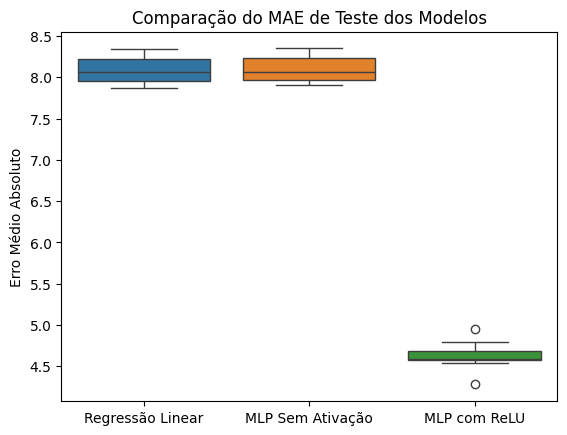

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('parkinsons.csv')

# Separar recursos (features) e variável alvo
X = data.drop(columns=['target'])
y = data['target']

# Listas para armazenar os MAEs de cada modelo
mae_linear = []
mae_mlp_no_activation = []
mae_mlp_relu = []

# Iterar sobre valores de random_state de 1 a 10
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    #Modelo de Regressão Linear
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    mae_linear.append(mean_absolute_error(y_test, y_pred_linear))
    
    #Regressor MLP sem funções de ativação
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0, max_iter=1000)
    mlp_no_activation.fit(X_train, y_train)
    y_pred_no_activation = mlp_no_activation.predict(X_test)
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred_no_activation))
    
    #Regressor MLP com funções de ativação ReLU
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0, max_iter=1000)
    mlp_relu.fit(X_train, y_train)
    y_pred_relu = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_relu))

# Criar um DataFrame com os MAEs de cada modelo
results_df = pd.DataFrame({
    'Regressão Linear': mae_linear,
    'MLP Sem Ativação': mae_mlp_no_activation,
    'MLP com ReLU': mae_mlp_relu
})

# Plotar o boxplot dos MAEs de teste para cada modelo
sns.boxplot(data=results_df)
plt.title('Comparação do MAE de Teste dos Modelos')
plt.ylabel('Erro Médio Absoluto')
plt.show()


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o grid de hiperparâmetros para o MLP
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Penalidade L2 (alpha)
    'learning_rate_init': [0.001, 0.01, 0.1],  # Taxa de aprendizado
    'batch_size': [32, 64, 128]  # Tamanho do lote
}

# Modelo MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0, max_iter=1000)

# Divisão treino-teste 80-20 com random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Executar Grid Search com validação cruzada de 3 vezes (cv=3)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3)
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Prever e calcular o MAE no conjunto de teste com o melhor modelo
y_pred_grid = best_model.predict(X_test)
mae_grid = mean_absolute_error(y_test, y_pred_grid)

print(f"Melhores parâmetros: {best_params}")
print(f"MAE no conjunto de teste com o melhor modelo: {mae_grid}")

# Resultados da Grid Search
results = pd.DataFrame(grid_search.cv_results_)
results['param_combination'] = results['param_alpha'].astype(str) + ', ' + \
                               results['param_learning_rate_init'].astype(str) + ', ' + \
                               results['param_batch_size'].astype(str)

# Plotar o MAE (negativo) para cada combinação de hiperparâmetros
sns.barplot(x='param_combination', y='mean_test_score', data=results)
plt.xticks(rotation=90)
plt.title('MAE para Cada Combinação de Hiperparâmetros')
plt.ylabel('Mean Absolute Error (negativo)')
plt.show()

KeyError: "['motor_UPDRS'] not found in axis"